In [16]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

In [3]:
%pwd

'/data03/team01/sidd/medium'

In [5]:
%ls -la tot

total 136
drwxrwxr-x 4 1000 1000  4096 Sep  6 16:59 ./
drwxrwxr-x 7 1000 1000  4096 Sep  7 13:55 ../
drwxrwxr-x 2 1000 1000 65536 Sep  6 19:28 010/
drwxrwxr-x 3 1000 1000 65536 Sep  6 19:27 011/


In [6]:
base_dir = '/data03/team01/sidd/medium/tot/010'

In [11]:
rfiles = glob.glob(os.path.join(base_dir, '*.npy'))
rfiles.sort()
len(rfiles)

320

In [12]:
sfiles = glob.glob(os.path.join(base_dir, '*.PNG'))
sfiles.sort()
len(sfiles)

320

In [15]:
for rf, sf in zip(nfiles, sfiles):
    print(rf, ' <-->',sf)

/data03/team01/sidd/medium/tot/010/0001_GT_RAW_010_3000x5328.npy  <--> /data03/team01/sidd/medium/tot/010/0001_GT_SRGB_010.PNG
/data03/team01/sidd/medium/tot/010/0001_NOISY_RAW_010_3000x5328.npy  <--> /data03/team01/sidd/medium/tot/010/0001_NOISY_SRGB_010.PNG
/data03/team01/sidd/medium/tot/010/0002_GT_RAW_010_3000x5328.npy  <--> /data03/team01/sidd/medium/tot/010/0002_GT_SRGB_010.PNG
/data03/team01/sidd/medium/tot/010/0002_NOISY_RAW_010_3000x5328.npy  <--> /data03/team01/sidd/medium/tot/010/0002_NOISY_SRGB_010.PNG
/data03/team01/sidd/medium/tot/010/0003_GT_RAW_010_3000x5328.npy  <--> /data03/team01/sidd/medium/tot/010/0003_GT_SRGB_010.PNG
/data03/team01/sidd/medium/tot/010/0003_NOISY_RAW_010_3000x5328.npy  <--> /data03/team01/sidd/medium/tot/010/0003_NOISY_SRGB_010.PNG
/data03/team01/sidd/medium/tot/010/0004_GT_RAW_010_3000x5328.npy  <--> /data03/team01/sidd/medium/tot/010/0004_GT_SRGB_010.PNG
/data03/team01/sidd/medium/tot/010/0004_NOISY_RAW_010_3000x5328.npy  <--> /data03/team01/sidd

# visualize RAW and make fake rgb

In [20]:
fname = '/data03/team01/sidd/medium/tot/010/0001_GT_RAW_010_3000x5328.npy'
arr_bayer = np.load(fname)
arr_bayer.shape

(3000, 5328)

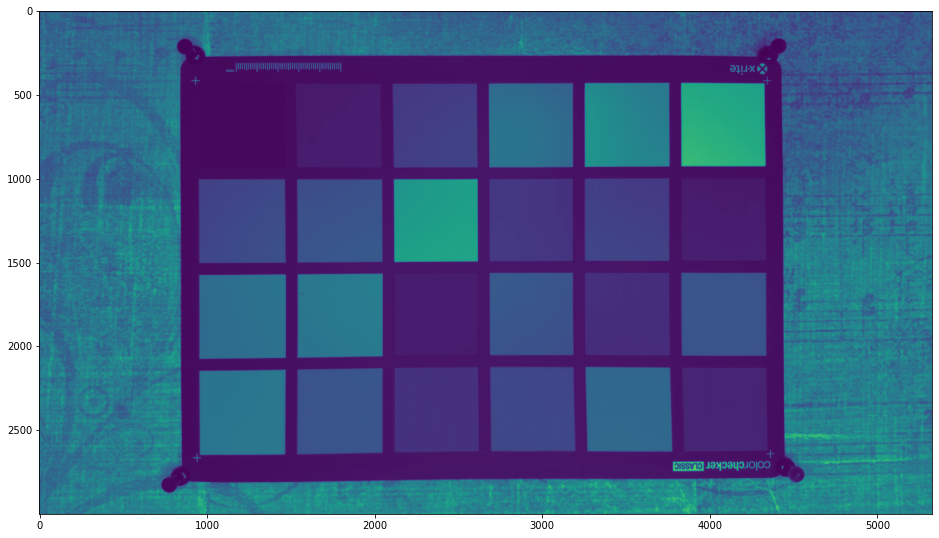

In [24]:
plt.figure(figsize=(16,16))
plt.imshow(arr_bayer)

In [25]:
print(np.amin(arr_bayer), np.amax(arr_bayer))

0.00042919882 0.13182744


In [30]:
def make_bayer_viz(arr_bayer):
    arr_bayer_viz = np.zeros(list(arr_bayer.shape) + [3] )
    arr_bayer_viz[0::2, 0::2, 1] = arr_bayer[0::2, 0::2] # Gr
    arr_bayer_viz[0::2, 1::2, 0] = arr_bayer[0::2, 1::2] # R
    arr_bayer_viz[1::2, 0::2, 2] = arr_bayer[1::2, 0::2] # B
    arr_bayer_viz[1::2, 1::2, 1] = arr_bayer[1::2, 1::2] # Gb
    
    return arr_bayer_viz
    

[3000, 5328, 3]